Link del [informe](https://www.overleaf.com/read/gxvzbdxgqfhc)


Link al [repo](https://github.com/moreover22/datos) 



## Inicializacion de entorno

In [ ]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension
# !pip uninstall pandas-profiling
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 9.2MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 17.2MB/s 
     |████████████████████████████████| 604kB 36.6MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 296kB 50.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=128dc5695c77c1581931c9b686c1ce53c56a119798d6e644e66e9dddbf2dc9d2
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=b119fce46e01afaf4492d57b59dfb3d40f0ec563c588c688fded2cb961e9f114
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

## Carga y Filtrado de Datos

In [ ]:
df = pd.read_csv('https://drive.google.com/u/0/'
                  'uc?id=1a3OnaiU0L0PemQSY1aq_8HIYYn_0WZys'
                  '&export=download')
df.sample(10).T

,7361,9312,4232,7080,8672,6228,15978,3969,15742,16254
ID,11334,13873,27767,11108,27297,10501,22908,10515,9286,20248
Region,Americas,Americas,EMEA,EMEA,Japan,Americas,Japan,EMEA,Middle East,Americas
Territory,SE America,None,Netherlands,France,None,NW America,Japan,Netherlands,UAE (Dubai),NW America
"Pricing, Delivery_Terms_Quote_Appr",0,1,1,1,1,0,1,1,1,1
"Pricing, Delivery_Terms_Approved",0,1,1,1,1,0,1,1,1,1
Bureaucratic_Code_0_Approval,0,1,0,0,0,0,1,1,1,1
Bureaucratic_Code_0_Approved,0,1,0,0,0,0,1,1,1,0
Submitted_for_Approval,0,0,0,0,0,0,0,0,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_2
Account_Created_Date,12/7/2017,5/18/2017,6/16/2015,3/3/2016,4/20/2015,3/15/2017,9/23/2013,2/2/2016,11/13/2018,8/22/2013


In [ ]:
del df['Prod_Category_A']
del df['Actual_Delivery_Date']
del df['ASP_Currency'] # Está en moneda local
del df['ASP'] # Está en moneda local
del df['Last_Activity']
del df['Submitted_for_Approval'] # Llena de 0s

In [ ]:
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Bureaucratic_Code                   16947 non-null  object        
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  object        
 10  Billing_Country       

## Reporte Perfilado de Pandas

In [ ]:
# TODO: Se podría hacer un filtering previo
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

## Exploracion de Datos

In [ ]:
df.groupby('Stage').size()

Stage
Closed Lost      7350
Closed Won       9533
Negotiation        18
Proposal           35
Qualification      11
dtype: int64

In [ ]:
df.groupby('Opportunity_Name').size()

Opportunity_Name
Opportunity_Name_0        7
Opportunity_Name_1        7
Opportunity_Name_100      1
Opportunity_Name_1000     1
Opportunity_Name_10000    1
                         ..
Opportunity_Name_9992     1
Opportunity_Name_9995     2
Opportunity_Name_9996     1
Opportunity_Name_9997     1
Opportunity_Name_9998     2
Length: 9841, dtype: int64

In [ ]:
df.groupby('Region').size()

Region
APAC           3262
Americas       3945
EMEA           4664
Japan          4892
Middle East     184
dtype: int64

In [ ]:
df.groupby('Territory').size()

Territory
Albania              2
Armenia              2
Australia         1208
Austria            145
Belarus              4
                  ... 
UAE (Dubai)         31
UAE (Others)         2
Ukraine              5
United Kingdom     313
Vietnam             51
Length: 76, dtype: int64

In [ ]:
df.groupby('Opportunity_Type').size().sort_values()

Opportunity_Type
Opportunity_Type_24       1
Opportunity_Type_6        2
Opportunity_Type_11       3
Opportunity_Type_13       4
Opportunity_Type_16       4
Opportunity_Type_23       5
Opportunity_Type_21       6
Opportunity_Type_0        8
Opportunity_Type_17       8
Opportunity_Type_15       9
Opportunity_Type_22      10
Opportunity_Type_18      11
Opportunity_Type_5       14
Opportunity_Type_14      15
Opportunity_Type_9       23
Opportunity_Type_10      34
Opportunity_Type_4       51
Opportunity_Type_2       70
Opportunity_Type_20     175
Opportunity_Type_3      275
Opportunity_Type_12     279
Opportunity_Type_8     1458
Opportunity_Type_19    1900
Opportunity_Type_7     5763
Opportunity_Type_1     6819
dtype: int64

In [ ]:
df.groupby('Delivery_Terms').size()

Delivery_Terms
Delivery_Terms_0       6
Delivery_Terms_1    2936
Delivery_Terms_2    4633
Delivery_Terms_3      41
Delivery_Terms_4    7712
Delivery_Terms_5     636
Delivery_Terms_6     781
Delivery_Terms_7      38
Delivery_Terms_8     164
dtype: int64

In [ ]:
df.groupby('Product_Family').size().sort_values()

Product_Family
Product_Family_177       1
Product_Family_55        1
Product_Family_241       1
Product_Family_239       1
Product_Family_53        1
                      ... 
Product_Family_100     619
Product_Family_212     636
Product_Family_132     763
Product_Family_133    1249
Product_Family_77     1345
Length: 227, dtype: int64

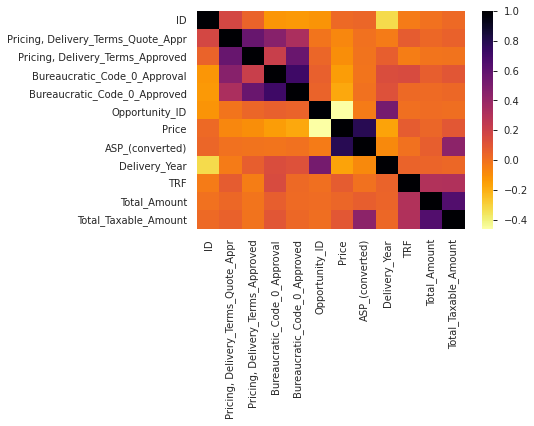

In [ ]:
matriz_correlacion = df.corr()
_ = sns.heatmap(matriz_correlacion, cmap='inferno_r')

# Relacion de las propiedades con Stage





In [ ]:
stage_ordenado = ['Closed Won', 'Closed Lost', 'Negotiation', 'Proposal', 'Qualification']

## Region




In [ ]:
df['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [ ]:
region_registros = df.groupby('Region')['ID'].transform(lambda x: x.count())
eci_region = df[region_registros > 1000] # Filtramos regiones con mas de 1000 registros

region_stage = eci_region.groupby(['Region'])['Stage'].value_counts(normalize=True)*100
region_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Region,,,,,
Japan,67.927228,31.602617,0.020442,0.286182,0.163532
APAC,58.123850,41.538933,0.000000,0.245248,0.091968
EMEA,52.980274,46.933962,0.021441,0.064322,0.000000
Americas,45.449937,54.245881,0.202788,0.101394,0.000000


## Tipo de cuenta

In [ ]:
df['Account_Type'].value_counts()

Account_Type_2    8832
Account_Type_0    5868
Account_Type_5    1943
Account_Type_1     165
None               112
Account_Type_6      17
Account_Type_4      10
Name: Account_Type, dtype: int64

In [ ]:
tipo_cuenta_registros = df.groupby('Account_Type')['ID'].transform(lambda x: x.count())
eci_tipo_cuenta = df[tipo_cuenta_registros > 1000] # Filtramos tipos de cuenta con mas de 1000 registros

tipo_cuenta_stage = eci_tipo_cuenta.groupby(['Account_Type'])['Stage'].value_counts(normalize=True)*100
tipo_cuenta_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Account_Type,,,,,
Account_Type_0,70.688480,29.277437,0.000000,0.034083,0.00000
Account_Type_2,53.951540,45.527627,0.192482,0.237772,0.09058
Account_Type_5,29.696346,69.531652,0.051467,0.566135,0.15440


## Tipo de oportunidad

In [ ]:
df['Opportunity_Type'].value_counts()

Opportunity_Type_1     6819
Opportunity_Type_7     5763
Opportunity_Type_19    1900
Opportunity_Type_8     1458
Opportunity_Type_12     279
Opportunity_Type_3      275
Opportunity_Type_20     175
Opportunity_Type_2       70
Opportunity_Type_4       51
Opportunity_Type_10      34
Opportunity_Type_9       23
Opportunity_Type_14      15
Opportunity_Type_5       14
Opportunity_Type_18      11
Opportunity_Type_22      10
Opportunity_Type_15       9
Opportunity_Type_17       8
Opportunity_Type_0        8
Opportunity_Type_21       6
Opportunity_Type_23       5
Opportunity_Type_16       4
Opportunity_Type_13       4
Opportunity_Type_11       3
Opportunity_Type_6        2
Opportunity_Type_24       1
Name: Opportunity_Type, dtype: int64

In [ ]:
tipo_oportunidad_registros = df.groupby('Opportunity_Type')['ID'].transform(lambda x: x.count())
eci_tipo_oportunidad = df[tipo_oportunidad_registros > 1000] # Filtramos tipo de oportunidad con mas de 1000 registros

tipo_oportunidad_stage = eci_tipo_oportunidad.groupby(['Opportunity_Type'])['Stage'].value_counts(normalize=True)*100
tipo_oportunidad_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Opportunity_Type,,,,,
Opportunity_Type_8,70.233196,29.766804,0.000000,0.000000,0.000000
Opportunity_Type_7,68.384522,31.563422,0.000000,0.052056,0.000000
Opportunity_Type_1,53.042968,46.297111,0.249303,0.307963,0.102654
Opportunity_Type_19,21.000000,78.421053,0.052632,0.421053,0.105263


## Vendedor responsable del cliente

In [ ]:
df.Account_Owner.value_counts().head(10)

Person_Name_50    3730
Person_Name_13    1328
Person_Name_8     1286
Person_Name_43    1241
Person_Name_18    1093
Person_Name_3      875
Person_Name_32     682
Person_Name_4      664
Person_Name_65     631
Person_Name_64     577
Name: Account_Owner, dtype: int64

In [ ]:
vendedor_cliente_registros = df.groupby('Account_Owner')['ID'].transform(lambda x: x.count())
eci_vendedor_cliente = df[vendedor_cliente_registros > 1000] # Filtramos vendedor con mas de 1000 registros

vendedor_cliente_stage = eci_vendedor_cliente.groupby(['Account_Owner'])['Stage'].value_counts(normalize=True)*100
vendedor_cliente_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Account_Owner,,,,,
Person_Name_13,67.093373,32.831325,0.075301,0.000000,0.000000
Person_Name_50,64.959786,34.825737,0.000000,0.026810,0.187668
Person_Name_8,59.331260,40.668740,0.000000,0.000000,0.000000
Person_Name_43,58.581789,40.934730,0.000000,0.322321,0.161160
Person_Name_18,54.620311,45.379689,0.000000,0.000000,0.000000


## Vendedor responsable de la Oportunidad

In [ ]:
df.Opportunity_Owner.value_counts().head(10)

Person_Name_50    3781
Person_Name_8     1422
Person_Name_13    1254
Person_Name_18     982
Person_Name_43     838
Person_Name_3      832
Person_Name_4      687
Person_Name_32     686
Person_Name_19     615
Person_Name_64     516
Name: Opportunity_Owner, dtype: int64

In [ ]:
vendedor_oportunidad_registros = df.groupby('Opportunity_Owner')['ID'].transform(lambda x: x.count())
eci_vendedor_oportunidad = df[vendedor_oportunidad_registros > 1000] # Filtramos vendedor con mas de 1000 registros

vendedor_oportunidad_stage = eci_vendedor_oportunidad.groupby(['Opportunity_Owner'])['Stage'].value_counts(normalize=True)*100
vendedor_oportunidad_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Opportunity_Owner,,,,,
Person_Name_13,66.347687,33.572568,0.079745,0.000000,0.000000
Person_Name_50,65.829146,33.959270,0.000000,0.026448,0.185136
Person_Name_8,58.720113,41.279887,0.000000,0.000000,0.000000


## Familia de Producto

In [ ]:
df['Product_Family'].value_counts()

Product_Family_77     1345
Product_Family_133    1249
Product_Family_132     763
Product_Family_212     636
Product_Family_100     619
                      ... 
Product_Family_79        1
Product_Family_45        1
Product_Family_43        1
Product_Family_40        1
Product_Family_239       1
Name: Product_Family, Length: 227, dtype: int64

In [ ]:
familia_producto_registros = df.groupby('Product_Family')['ID'].transform(lambda x: x.count())
eci_familia_producto = df[familia_producto_registros > 500] # Filtramos vendedor con mas de 1000 registros

familia_producto_stage = eci_familia_producto.groupby(['Product_Family'])['Stage'].value_counts(normalize=True)*100
familia_producto_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Product_Family,,,,,
Product_Family_133,73.578863,26.421137,0.000000,0.000000,0.000000
Product_Family_115,71.666667,28.333333,0.000000,0.000000,0.000000
Product_Family_226,66.984733,33.015267,0.000000,0.000000,0.000000
Product_Family_132,63.433814,36.173001,0.131062,0.000000,0.262123
Product_Family_85,56.879195,43.120805,0.000000,0.000000,0.000000
Product_Family_100,51.211632,48.788368,0.000000,0.000000,0.000000
Product_Family_77,48.847584,51.152416,0.000000,0.000000,0.000000
Product_Family_212,41.666667,57.232704,0.157233,0.786164,0.157233


## Terminos de Entrega

In [ ]:
df['Delivery_Terms'].value_counts()

Delivery_Terms_4    7712
Delivery_Terms_2    4633
Delivery_Terms_1    2936
Delivery_Terms_6     781
Delivery_Terms_5     636
Delivery_Terms_8     164
Delivery_Terms_3      41
Delivery_Terms_7      38
Delivery_Terms_0       6
Name: Delivery_Terms, dtype: int64

In [ ]:
Delivery_Terms_registros = df.groupby('Delivery_Terms')['ID'].transform(lambda x: x.count())
eci_Delivery_Terms = df[Delivery_Terms_registros > 1000] # Filtramos Delivery_Termses con mas de 1000 registros

Delivery_Terms_stage = eci_Delivery_Terms.groupby(['Delivery_Terms'])['Stage'].value_counts(normalize=True)*100
Delivery_Terms_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Delivery_Terms,,,,,
Delivery_Terms_4,58.298755,41.312241,0.103734,0.181535,0.103734
Delivery_Terms_2,55.147852,44.787395,0.021584,0.043169,0.000000
Delivery_Terms_1,45.129428,53.985014,0.306540,0.476839,0.102180


## Pais de Facturacion

In [ ]:
df['Billing_Country'].value_counts()

Japan                     4879
United States             3802
Germany                   1979
Australia                 1169
India                      672
                          ... 
Bosnia and Herzegovina       1
Kenya                        1
Colombia                     1
Liechtenstein                1
Libya                        1
Name: Billing_Country, Length: 80, dtype: int64

In [ ]:
Billing_Country_registros = df.groupby('Billing_Country')['ID'].transform(lambda x: x.count())
eci_Billing_Country = df[Billing_Country_registros > 1000] # Filtramos Billing_Country con mas de 1000 registros

Billing_Country_stage = eci_Billing_Country.groupby(['Billing_Country'])['Stage'].value_counts(normalize=True)*100
Billing_Country_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Billing_Country,,,,,
Japan,68.108219,31.420373,0.020496,0.286944,0.163968
Australia,59.452524,40.205304,0.000000,0.342173,0.000000
Germany,56.695301,43.203638,0.050531,0.050531,0.000000
United States,46.159916,53.524461,0.210416,0.105208,0.000000


## Agrupaciones

### Region - Terminos de Entrega

In [ ]:
# Porcentaje de Stage para Region y Delivery_Terms

region_delivery_registros = df.groupby(['Region','Delivery_Terms'])['ID'].transform(lambda x: x.count())
eci_region_delivery = df[region_delivery_registros > 500] # Filtramos regiones con mas de 500 registros

region_delivery_stage = eci_region_delivery.groupby(['Region','Delivery_Terms'])['Stage'].value_counts(normalize=True)*100
region_delivery_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage                      Closed Won  Closed Lost  ...  Proposal  Qualification
Region   Delivery_Terms                             ...                         
APAC     Delivery_Terms_6   83.408072    16.591928  ...  0.000000       0.000000
Japan    Delivery_Terms_5   71.709234    27.701375  ...  0.589391       0.000000
         Delivery_Terms_4   67.541212    32.017646  ...  0.255398       0.185744
EMEA     Delivery_Terms_2   54.560261    45.369940  ...  0.046533       0.000000
APAC     Delivery_Terms_1   50.090009    49.414941  ...  0.360036       0.135014
Americas Delivery_Terms_4   46.527778    53.140097  ...  0.090580       0.000000

[6 rows x 5 columns]

### Region - Tipo de Cuenta

In [ ]:
# Porcentaje de Stage para Region y Tipo de Cuenta

region_cuenta_registros = df.groupby(['Region','Account_Type'])['ID'].transform(lambda x: x.count())
eci_region_cuenta = df[region_cuenta_registros > 500] # Filtramos regiones con mas de 500 registros

region_cuenta_stage = eci_region_cuenta.groupby(['Region','Account_Type'])['Stage'].value_counts(normalize=True)*100
region_cuenta_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

,Stage,Closed Won,Closed Lost,Negotiation,Proposal,Qualification
Region,Account_Type,,,,,
Japan,Account_Type_0,86.219512,13.780488,0.000000,0.000000,0.000000
APAC,Account_Type_0,68.320611,31.526718,0.000000,0.152672,0.000000
Americas,Account_Type_0,68.197880,31.802120,0.000000,0.000000,0.000000
EMEA,Account_Type_0,68.103117,31.896883,0.000000,0.000000,0.000000
Japan,Account_Type_2,64.705882,34.943680,0.025031,0.150188,0.175219
APAC,Account_Type_2,60.899654,38.615917,0.000000,0.415225,0.069204
Americas,Account_Type_2,39.246779,60.307235,0.396432,0.049554,0.000000
EMEA,Account_Type_2,37.888707,61.947627,0.000000,0.163666,0.000000
Americas,Account_Type_5,31.306991,68.237082,0.000000,0.455927,0.000000


### Pais de Facturacion - Terminos de Entrega

In [ ]:
# Porcentaje de Stage para Pais de Facturacion y Delivery_Terms

billing_delivery_registros = df.groupby(['Billing_Country','Delivery_Terms'])['ID'].transform(lambda x: x.count())
eci_billing_delivery = df[billing_delivery_registros > 500] # Filtramos Billing_Countryes con mas de 500 registros

billing_delivery_stage = eci_billing_delivery.groupby(['Billing_Country','Delivery_Terms'])['Stage'].value_counts(normalize=True)*100
billing_delivery_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage                             Closed Won  ...  Qualification
Billing_Country Delivery_Terms                ...               
Japan           Delivery_Terms_5   71.850394  ...       0.000000
                Delivery_Terms_4   67.556897  ...       0.185787
Germany         Delivery_Terms_2   58.247701  ...       0.000000
Australia       Delivery_Terms_1   56.893004  ...       0.000000
Netherlands     Delivery_Terms_2   56.049822  ...       0.000000
United States   Delivery_Terms_4   47.006173  ...       0.000000
India           Delivery_Terms_1   42.508711  ...       0.174216

[7 rows x 5 columns]

### Region - Tipo de Cuenta - Terminos de Entrega

In [ ]:
# Porcentaje de Stage para Region, Tipo de Cuenta y Delivery_Terms

region_cuenta_delivery_registros = df.groupby(['Region','Account_Type','Delivery_Terms'])['ID'].transform(lambda x: x.count())
eci_region_cuenta_delivery = df[region_cuenta_delivery_registros > 500] # Filtramos regiones con mas de 500 registros

region3_stage = eci_region_cuenta_delivery.groupby(['Region','Account_Type','Delivery_Terms'])['Stage'].value_counts(normalize=True)*100
region3_stage.unstack(fill_value=0).sort_values(by='Closed Won', ascending=False)[stage_ordenado]

Stage                                     Closed Won  ...  Qualification
Region   Account_Type   Delivery_Terms                ...               
Japan    Account_Type_0 Delivery_Terms_4   94.820717  ...       0.000000
Americas Account_Type_0 Delivery_Terms_4   69.103314  ...       0.000000
EMEA     Account_Type_0 Delivery_Terms_2   68.492063  ...       0.000000
Japan    Account_Type_2 Delivery_Terms_4   64.306706  ...       0.187016
APAC     Account_Type_0 Delivery_Terms_1   60.402685  ...       0.000000
         Account_Type_2 Delivery_Terms_1   52.304394  ...       0.107181
Americas Account_Type_2 Delivery_Terms_4   40.231990  ...       0.000000
EMEA     Account_Type_2 Delivery_Terms_2   37.465051  ...       0.000000
         Account_Type_5 Delivery_Terms_2   30.701754  ...       0.000000
Americas Account_Type_5 Delivery_Terms_4   29.423077  ...       0.000000

[10 rows x 5 columns]

# Visualizaciones

## Básicas


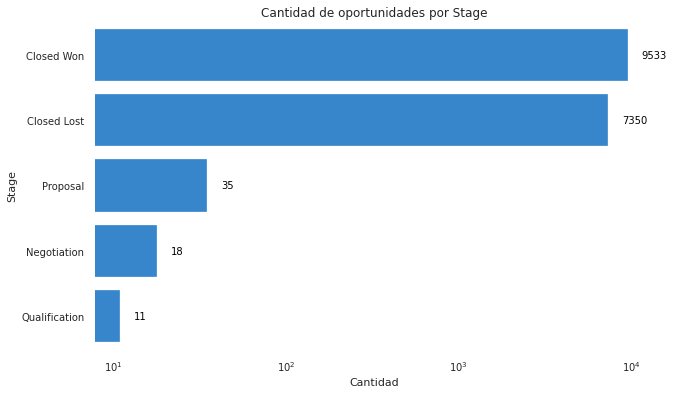

In [ ]:
import math
data_stage_count = df['Stage'].value_counts().sort_values(ascending=False) \
  .to_frame().reset_index().rename(columns={'index': 'Stage', 'Stage': 'Cantidad'})
  
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cantidad', y='Stage', data=data_stage_count, orient='h', 
                 palette=[(0.118, 0.533, 0.898)])
ax.set_title('Cantidad de oportunidades por Stage')
ax.set_xscale('log')
# plt.xticks([])
for index, row in data_stage_count.iterrows():
    ax.text(row['Cantidad'] * 1.2 , row.name, round(row['Cantidad'], 2), 
            color='black', ha='left', va='center')

## Cantidad de Oportunidades por Trimestre

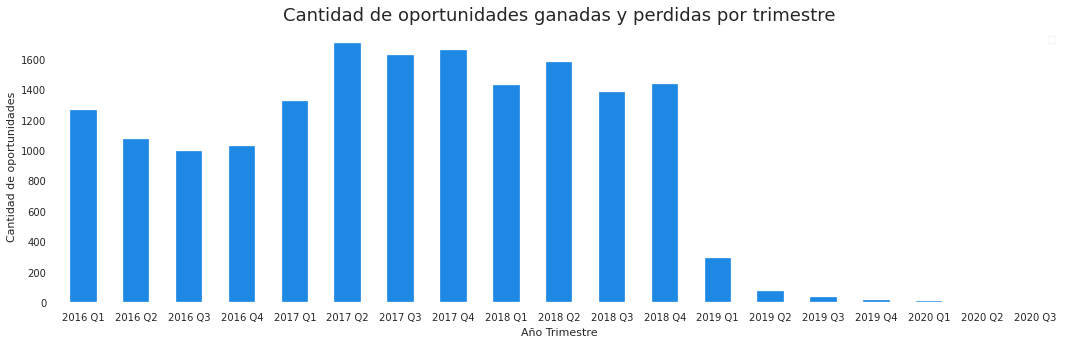

In [ ]:
oportunidades_por_trimestre = df.groupby(['Delivery_Year', 'Delivery_Quarter'])['ID'].count().reset_index()
oportunidades_por_trimestre['Trimestre'] = oportunidades_por_trimestre['Delivery_Year'].astype('string') + ' ' + oportunidades_por_trimestre['Delivery_Quarter']
del oportunidades_por_trimestre['Delivery_Year']
del oportunidades_por_trimestre['Delivery_Quarter']
oportunidades_por_trimestre.columns = ['Cant. Oportunidades', 'Trimestre']
ax = oportunidades_por_trimestre.plot(x='Trimestre', y='Cant. Oportunidades',
                                 kind='bar', figsize=(18, 5), rot=0,
                                 color=[(0.118, 0.533, 0.898)])


ax.set(xlabel='Año Trimestre', ylabel='Cantidad de oportunidades')
      
ax.set_title('Cantidad de oportunidades ganadas y perdidas por trimestre', fontdict={
                    'fontsize': 18,
                    'fontweight': 2,
                  }, pad=10)
ax.legend([])
print()

## Oportunidades Ganadas y Perdidas

Trimestre

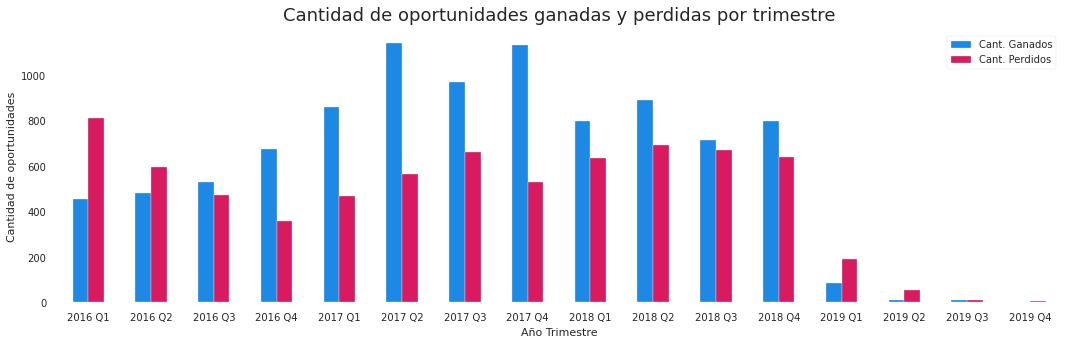

In [ ]:
stage_reducido = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]
stage_por_trimestre = stage_reducido.groupby(['Delivery_Year', 'Delivery_Quarter', 'Stage'])['ID'].count().unstack().reset_index()
stage_por_trimestre['Trimestre'] = stage_por_trimestre['Delivery_Year'].astype('string') + ' ' + stage_por_trimestre['Delivery_Quarter']
stage_por_trimestre = stage_por_trimestre[['Trimestre', 'Closed Won', 'Closed Lost']]
stage_por_trimestre.columns = ['Trimestre', 'Cant. Ganados', 'Cant. Perdidos']
ax = stage_por_trimestre.plot(x='Trimestre', y=['Cant. Ganados', 'Cant. Perdidos'],
                              kind='bar', figsize=(18, 5), rot=0, 
                              color=[(0.118, 0.533, 0.898),
                                     (0.847, 0.106, 0.376)]) # o ['darkblue', 'crimson']

ax.set(xlabel='Año Trimestre', ylabel='Cantidad de oportunidades')
      
ax.set_title('Cantidad de oportunidades ganadas y perdidas por trimestre', fontdict={
                    'fontsize': 18,
                    'fontweight': 2,
                  }, pad=10)
print()

In [ ]:
# df.plot.plot(x='Month',y='ASP_(converted)', figsize=(60, 5))

In [ ]:
# df['Precio']df['TRF']

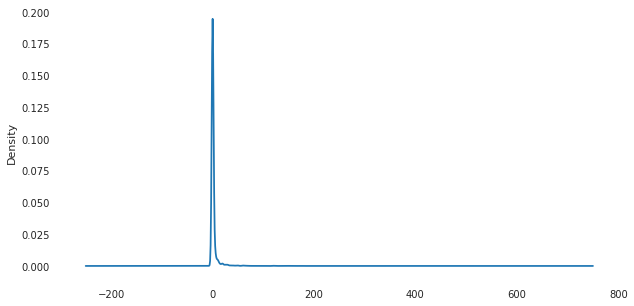

In [ ]:
df['TRF'].plot(kind='kde', figsize=(10, 5))

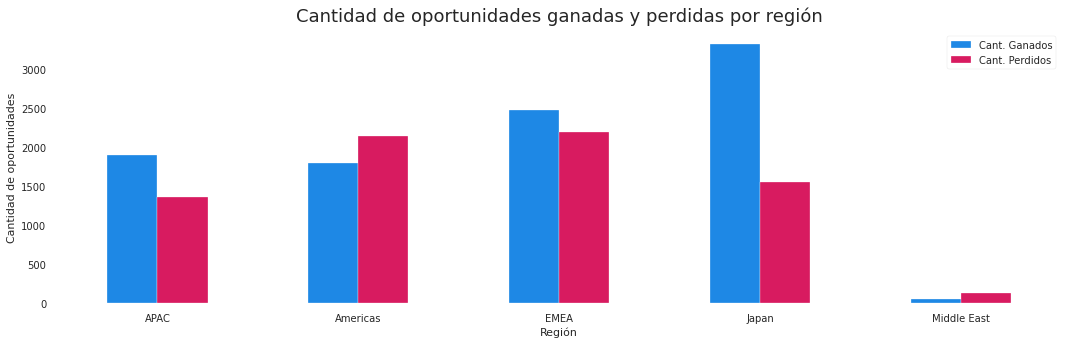

In [ ]:
# Oportunidades ganadas y perdidas por Region

stage_reducido = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]
stage_por_region = stage_reducido.groupby(['Region', 'Stage'])['ID'].count().unstack().reset_index()

stage_por_region = stage_por_region[['Region', 'Closed Won', 'Closed Lost']]
stage_por_region.columns = ['Region', 'Cant. Ganados', 'Cant. Perdidos']
ax = stage_por_region.plot(x='Region', y=['Cant. Ganados', 'Cant. Perdidos'], 
                      kind='bar', figsize=(18, 5), rot=0, 
                      color=[(0.118, 0.533, 0.898),
                              (0.847, 0.106, 0.376)]) # o ['darkblue', 'crimson']

ax.set(xlabel='Región', ylabel='Cantidad de oportunidades')
      
ax.set_title('Cantidad de oportunidades ganadas y perdidas por región', fontdict={
                    'fontsize': 18,
                    'fontweight': 2,
                  }, pad=10)
print()

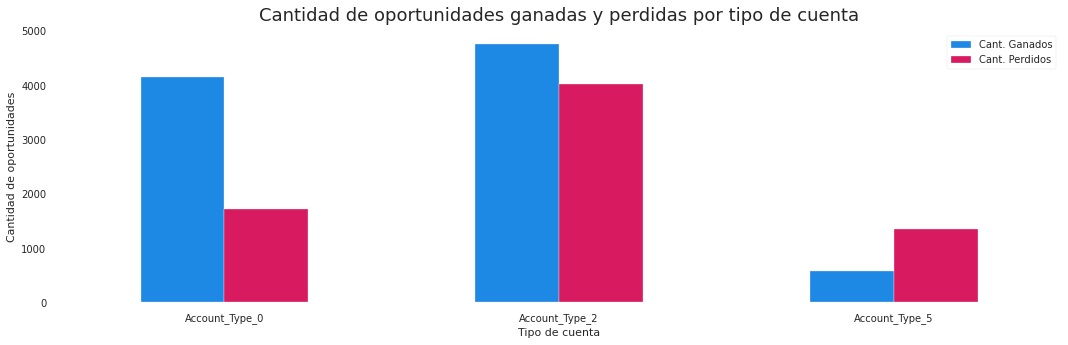

In [ ]:
# Oportunidades ganadas y perdidas por Account_Type (con mas de 1000 registros)

stage_reducido = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]
stage_por_Account_Type = stage_reducido.groupby(['Account_Type', 'Stage'])['ID'].count().unstack().reset_index()
stage_por_Account_Type = stage_por_Account_Type[(stage_por_Account_Type['Closed Lost'] + stage_por_Account_Type['Closed Won']) > 1000] #filtramos ec de moivre

stage_por_Account_Type = stage_por_Account_Type[['Account_Type', 'Closed Won', 'Closed Lost']]
stage_por_Account_Type.columns = ['Account_Type', 'Cant. Ganados', 'Cant. Perdidos']
ax = stage_por_Account_Type.plot(x='Account_Type', y=['Cant. Ganados', 'Cant. Perdidos'], 
                            kind='bar', figsize=(18, 5), rot=0, 
                            color=[(0.118, 0.533, 0.898),
                              (0.847, 0.106, 0.376)]) # o ['darkblue', 'crimson']

ax.set(xlabel='Tipo de cuenta', ylabel='Cantidad de oportunidades')
      
ax.set_title('Cantidad de oportunidades ganadas y perdidas por tipo de cuenta', fontdict={
                    'fontsize': 18,
                    'fontweight': 2,
                  }, pad=10)
print()

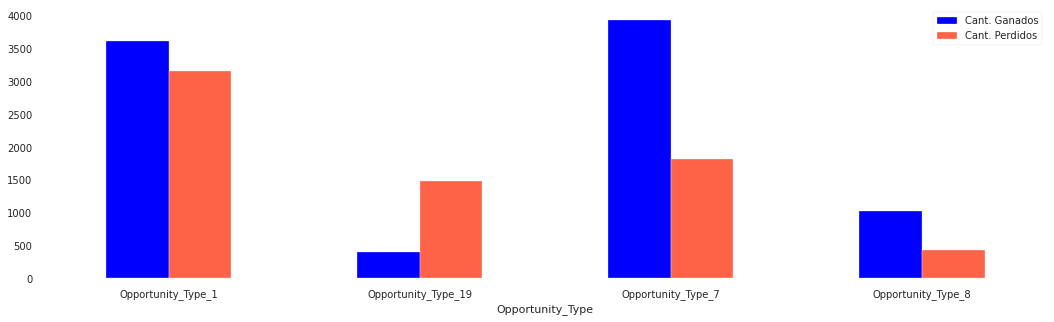

In [ ]:
# Oportunidades ganadas y perdidas por Opportunity_Type (con mas de 1000 registros)

stage_reducido = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]
stage_por_Opportunity_Type = stage_reducido.groupby(['Opportunity_Type', 'Stage'])['ID'].count().unstack().reset_index()
stage_por_Opportunity_Type = stage_por_Opportunity_Type[(stage_por_Opportunity_Type['Closed Lost'] + stage_por_Opportunity_Type['Closed Won']) > 1000] #filtramos ec de moivre

stage_por_Opportunity_Type = stage_por_Opportunity_Type[['Opportunity_Type', 'Closed Won', 'Closed Lost']]
stage_por_Opportunity_Type.columns = ['Opportunity_Type', 'Cant. Ganados', 'Cant. Perdidos']
ax = stage_por_Opportunity_Type.plot(x='Opportunity_Type', y=['Cant. Ganados', 'Cant. Perdidos'], kind='bar', figsize=(18, 5), rot=0, color=['blue', 'tomato']) # o ['darkblue', 'crimson']

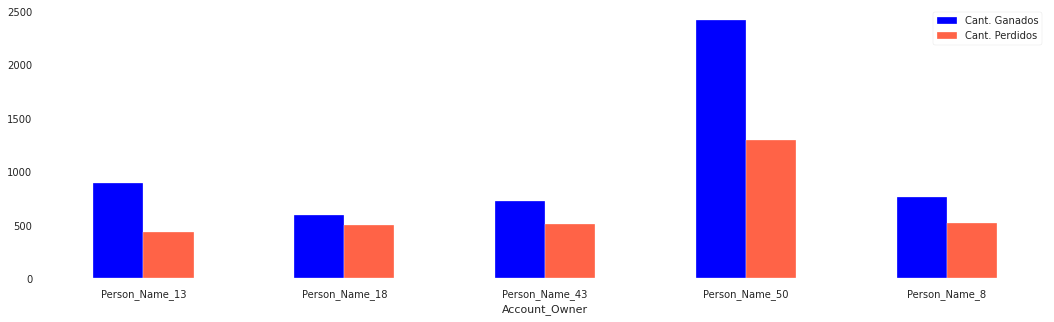

In [ ]:
# Oportunidades ganadas y perdidas por Account_Owner (con mas de 1000 registros)

stage_reducido = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]
stage_por_Account_Owner = stage_reducido.groupby(['Account_Owner', 'Stage'])['ID'].count().unstack().reset_index()
stage_por_Account_Owner = stage_por_Account_Owner[(stage_por_Account_Owner['Closed Lost'] + stage_por_Account_Owner['Closed Won']) > 1000] #filtramos ec de moivre

stage_por_Account_Owner = stage_por_Account_Owner[['Account_Owner', 'Closed Won', 'Closed Lost']]
stage_por_Account_Owner.columns = ['Account_Owner', 'Cant. Ganados', 'Cant. Perdidos']
stage_por_Account_Owner.plot(x='Account_Owner', y=['Cant. Ganados', 'Cant. Perdidos'], kind='bar', figsize=(18, 5), rot=0, color=['blue', 'tomato']) # o ['darkblue', 'crimson']

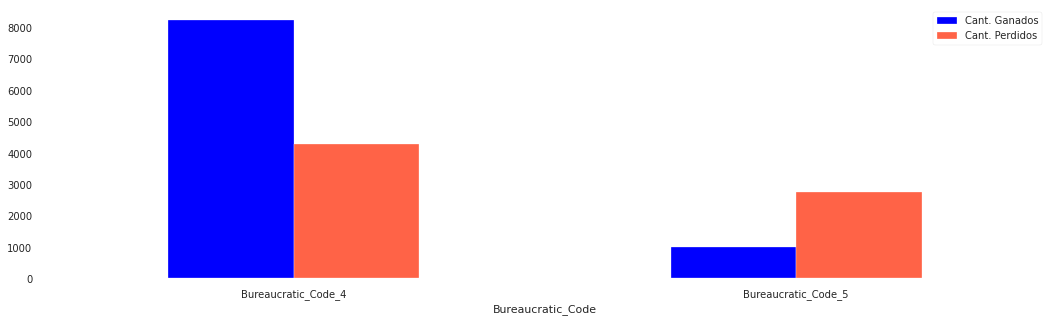

In [ ]:
# Oportunidades ganadas y perdidas por Bureaucratic_Code (con mas de 1000 registros)

stage_reducido = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]
stage_por_Bureaucratic_Code = stage_reducido.groupby(['Bureaucratic_Code', 'Stage'])['ID'].count().unstack().reset_index()
stage_por_Bureaucratic_Code = stage_por_Bureaucratic_Code[(stage_por_Bureaucratic_Code['Closed Lost'] + stage_por_Bureaucratic_Code['Closed Won']) > 1000] #filtramos ec de moivre

stage_por_Bureaucratic_Code = stage_por_Bureaucratic_Code[['Bureaucratic_Code', 'Closed Won', 'Closed Lost']]
stage_por_Bureaucratic_Code.columns = ['Bureaucratic_Code', 'Cant. Ganados', 'Cant. Perdidos']
stage_por_Bureaucratic_Code.plot(x='Bureaucratic_Code', y=['Cant. Ganados', 'Cant. Perdidos'], kind='bar', figsize=(18, 5), rot=0, color=['blue', 'tomato']) # o ['darkblue', 'crimson']

## Duración de la entrega por Región

In [ ]:
df[['Month', 'Delivery_Year', 'Delivery_Quarter']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             16947 non-null  object
 1   Delivery_Year     16947 non-null  int64 
 2   Delivery_Quarter  16947 non-null  object
dtypes: int64(1), object(2)
memory usage: 397.3+ KB


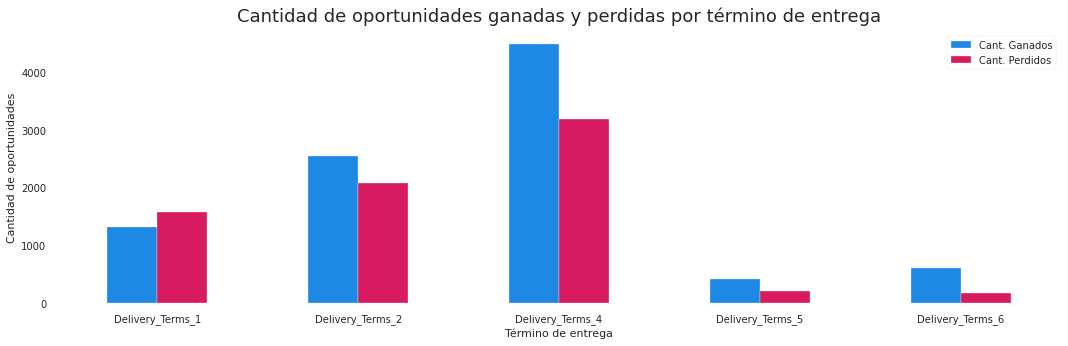

In [ ]:
# Oportunidades ganadas y perdidas por Delivery_Terms (con mas de 1000 registros)

stage_reducido = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]
stage_por_Delivery_Terms = (stage_reducido.groupby(['Delivery_Terms', 
                                                    'Stage'])['ID']
                            .count().unstack().reset_index())
stage_por_Delivery_Terms = \
  stage_por_Delivery_Terms[(stage_por_Delivery_Terms['Closed Lost'] 
                            + stage_por_Delivery_Terms['Closed Won']) > 500] #filtramos ec de moivre

stage_por_Delivery_Terms = stage_por_Delivery_Terms[['Delivery_Terms', 'Closed Won', 'Closed Lost']]
stage_por_Delivery_Terms.columns = ['Delivery_Terms', 'Cant. Ganados', 'Cant. Perdidos']
ax = stage_por_Delivery_Terms.plot(x='Delivery_Terms', 
                                   y=['Cant. Ganados', 'Cant. Perdidos'], 
                                   kind='bar', figsize=(18, 5), rot=0, 
                                   color=[(0.118, 0.533, 0.898),
                                          (0.847, 0.106, 0.376)]) # o ['darkblue', 'crimson']

ax.set(xlabel='Término de entrega', ylabel='Cantidad de oportunidades')
      
ax.set_title('Cantidad de oportunidades ganadas y perdidas por término de entrega', fontdict={
                    'fontsize': 18,
                    'fontweight': 2,
                  }, pad=10)
print()

In [ ]:
df['Delivery_Interval'] = (df['Planned_Delivery_End_Date'] - 
                           df['Planned_Delivery_Start_Date']).dt.days
casos_cerrados_filtrados_por_intervalo = df[(df['Delivery_Interval'] < 2000) & 
                                    (df['Stage'] == 'Closed Won')]

df[(df['Delivery_Interval'] >= 2000)]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Delivery_Interval
15370,5997,EMEA,Netherlands,0,0,0,0,Bureaucratic_Code_4,2018-08-07,Source_7,Netherlands,Account_Name_1149,Opportunity_Name_7055,9773,None,Person_Name_18,Person_Name_51,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,10/12/2018,Other,Other,Other,Other,NaN,EUR,12/31/2018,11/28/2018,Person_Name_51,Product_Family_127,Product_Name_214,USD,0.35629,2018-10-14,2208-12-31,2018 - 10,Q4,2018,0,EUR,134662.5,EUR,290713.5,Closed Lost,69474.0


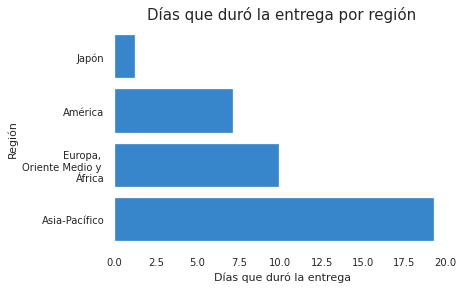

In [ ]:
promedio_intervalos_por_region = casos_cerrados_filtrados_por_intervalo \
  .groupby('Region').agg({
      'Delivery_Interval': ['count', 'mean']
  })[['Delivery_Interval']]

promedio_intervalos_por_region = promedio_intervalos_por_region[
  promedio_intervalos_por_region[('Delivery_Interval', 'count')] > 200
][[('Delivery_Interval', 'mean')]]

promedio_intervalos_por_region.columns = ['Delivery_Interval']
promedio_intervalos_por_region = promedio_intervalos_por_region \
  .sort_values(by='Delivery_Interval').reset_index()

axes = sns.barplot(data=promedio_intervalos_por_region,
            x='Delivery_Interval', y='Region',
            color='#1E88E5')

axes.set(xlabel='Días que duró la entrega', ylabel='Región')
axes.set_title('Días que duró la entrega por región', fontdict={
                    'fontsize': 15,
                    'fontweight': 2,
                  }, pad=10)

regiones_espanol = {
    'Japan': 'Japón',
    'Americas': 'América',
    'APAC': 'Asia-Pacífico',
    'EMEA': 'Europa, \nOriente Medio y \nÁfrica',
    'Middle East': 'Medio Oriente',
}
_ = axes.set_yticklabels([regiones_espanol[label.get_text()] 
                      for label in axes.get_yticklabels()])

In [ ]:
import matplotlib.ticker as mticker

Text(0.5, 1.0, 'Evolución de la monto total por moneda')

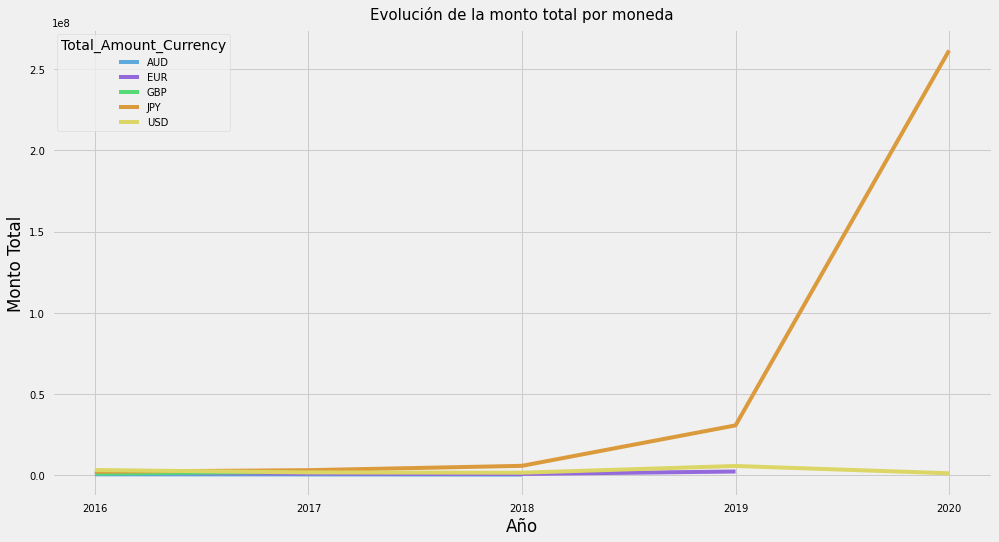

In [ ]:
promedio_intervalos_por_region = df.groupby(['Total_Amount_Currency', 'Delivery_Year'])\
  .agg({
      'Total_Amount': 'mean'
  })[['Total_Amount']].unstack()

promedio_intervalos_por_region.columns = [anio for _, anio in 
                                          promedio_intervalos_por_region.columns]

axes = promedio_intervalos_por_region.T \
  .plot.line(figsize=(15,8),
  color=[
      '#5EA9DB',
      '#9469DB',
      '#54DB76',
      '#DB9B3D',
      '#DBD665',
  ])
axes.xaxis.set_major_locator(mticker.MultipleLocator(1))

axes.set(xlabel='Año', ylabel='Monto Total')
axes.set_title('Evolución de la monto total por moneda', fontdict={
                    'fontsize': 15,
                    'fontweight': 2, }, pad=10)

#_ = axes.legend([regiones_espanol.get(label, label) 
             # for label in axes.get_legend_handles_labels()[1]])

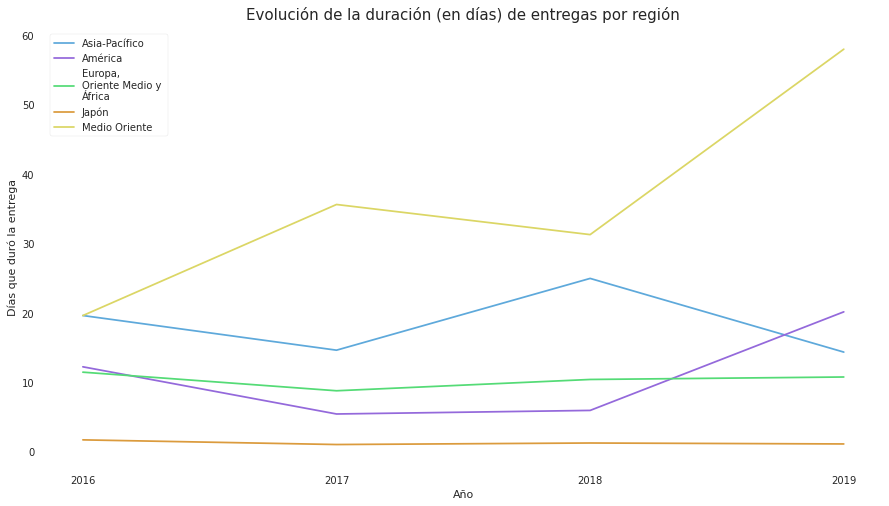

In [ ]:
# TODO: Sacar middle east, no sé si está incluido en EMEA
# TODO: Filtrar los que tienen pocos registros
promedio_intervalos_por_region = casos_cerrados_filtrados_por_intervalo \
  .groupby(['Region', 'Delivery_Year'])\
  .agg({
      'Delivery_Interval': 'mean'
  })[['Delivery_Interval']].unstack()

promedio_intervalos_por_region.columns = [anio for _, anio in 
                                          promedio_intervalos_por_region.columns]

axes = promedio_intervalos_por_region.T \
  .plot.line(figsize=(15,8),
  color=[
      '#5EA9DB',
      '#9469DB',
      '#54DB76',
      '#DB9B3D',
      '#DBD665',
  ])
axes.xaxis.set_major_locator(mticker.MultipleLocator(1))

axes.set(xlabel='Año', ylabel='Días que duró la entrega')
axes.set_title('Evolución de la duración (en días) de entregas por región', fontdict={
                    'fontsize': 15,
                    'fontweight': 2,
                  }, pad=10)

_ = axes.legend([regiones_espanol.get(label, label) 
             for label in axes.get_legend_handles_labels()[1]])

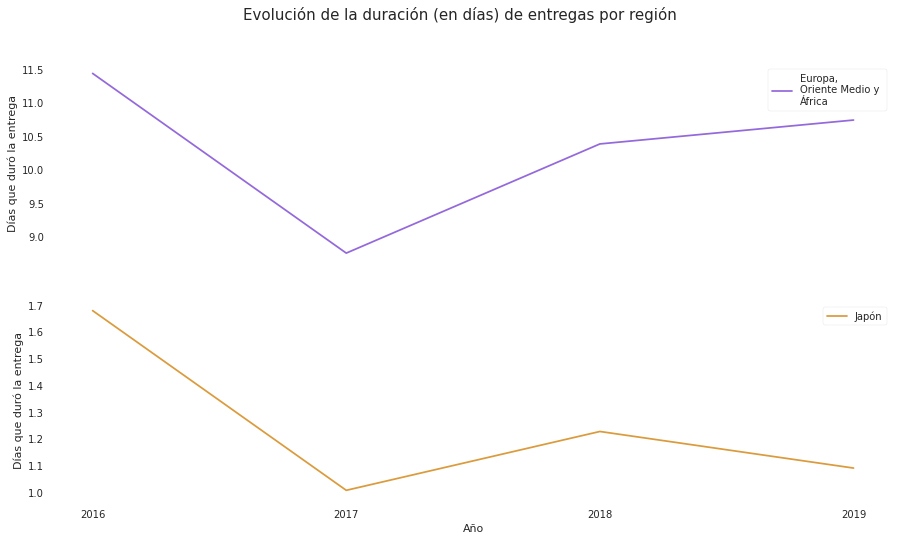

In [ ]:
import random
regions = ['EMEA', 'Japan']
promedio_intervalos_por_region = casos_cerrados_filtrados_por_intervalo[
  (casos_cerrados_filtrados_por_intervalo['Region'] == 'Japan') | \
  (casos_cerrados_filtrados_por_intervalo['Region'] == 'EMEA')
] \
  .groupby(['Region', 'Delivery_Year'])\
  .agg({
      'Delivery_Interval': 'mean'
  })[['Delivery_Interval']].unstack()

promedio_intervalos_por_region.columns = [anio for _, anio in 
                                          promedio_intervalos_por_region.columns]
promedio_intervalos_por_region.T.head()

fig, axes = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
for i, region in enumerate(regions):
  promedio_intervalos_por_region.iloc[i, :].T \
    .plot.line(figsize=(15,8),
    color=([
        '#9469DB',
        '#DB9B3D',
    ][i]), ax=axes[i])
  axes[i].xaxis.set_major_locator(mticker.MultipleLocator(1))

  axes[i].set(xlabel='Año', ylabel='Días que duró la entrega')

  axes[i].legend([regiones_espanol.get(label, label) 
              for label in axes[i].get_legend_handles_labels()[1]])
_ = fig.suptitle('Evolución de la duración (en días) de entregas por región', fontsize=15)

In [ ]:
df_filtrados_por_intervalo = df[(df['Delivery_Interval'] < 500) & 
                                df['Stage'].str.startswith('Closed')]
df_filtrados_por_intervalo[['TRF', 'Delivery_Interval']] \
  .describe().T

,count,mean,std,min,25%,50%,75%,max
TRF,16801.0,2.302601,12.054533,0.0,0.0,0.0,1.0,500.0
Delivery_Interval,16801.0,18.461461,39.677309,0.0,0.0,4.0,24.0,452.0


In [ ]:
import matplotlib.ticker as ticker

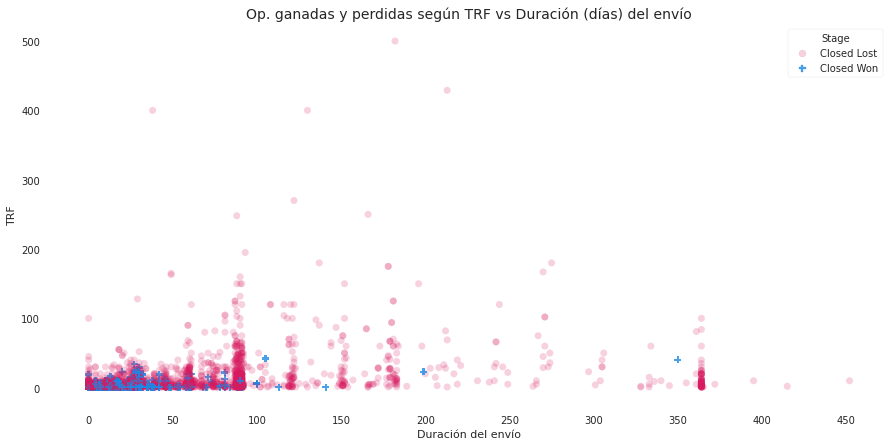

In [ ]:

# plt.figure(figsize=(30, 30))
# axes = 
def plot_scatter_trf_vs_delivery(data, name, ax):
  sns.scatterplot(x='Delivery_Interval', y='TRF', 
                  data=data \
                  [data['TRF'] > 0],
                  hue='Stage', linewidth=0, style='Stage', markers={
                      'Closed Won': 'P',
                      'Closed Lost': 'o',
                  }, palette={
                      'Closed Won': (0.118, 0.533, 0.898, 0.8),
                      'Closed Lost': (0.847, 0.106, 0.376, 0.2),
                  }, ax=ax)
  ax.set(xlabel='Duración del envío', 
          ylabel='TRF')
  ax.set_title(name, 
              fontdict={
                  'fontsize': 10,
                  'fontweight': 2,
                })
  ax.xaxis.set_major_locator(ticker.MultipleLocator(50))

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plot_scatter_trf_vs_delivery(df_filtrados_por_intervalo, 
                             'Op. ganadas y perdidas según TRF vs Duración (días) del envío', ax)
ax.set_title('Op. ganadas y perdidas según TRF vs Duración (días) del envío', 
              fontdict={
                  'fontsize': 14,
                  'fontweight': 2,
                })
print()

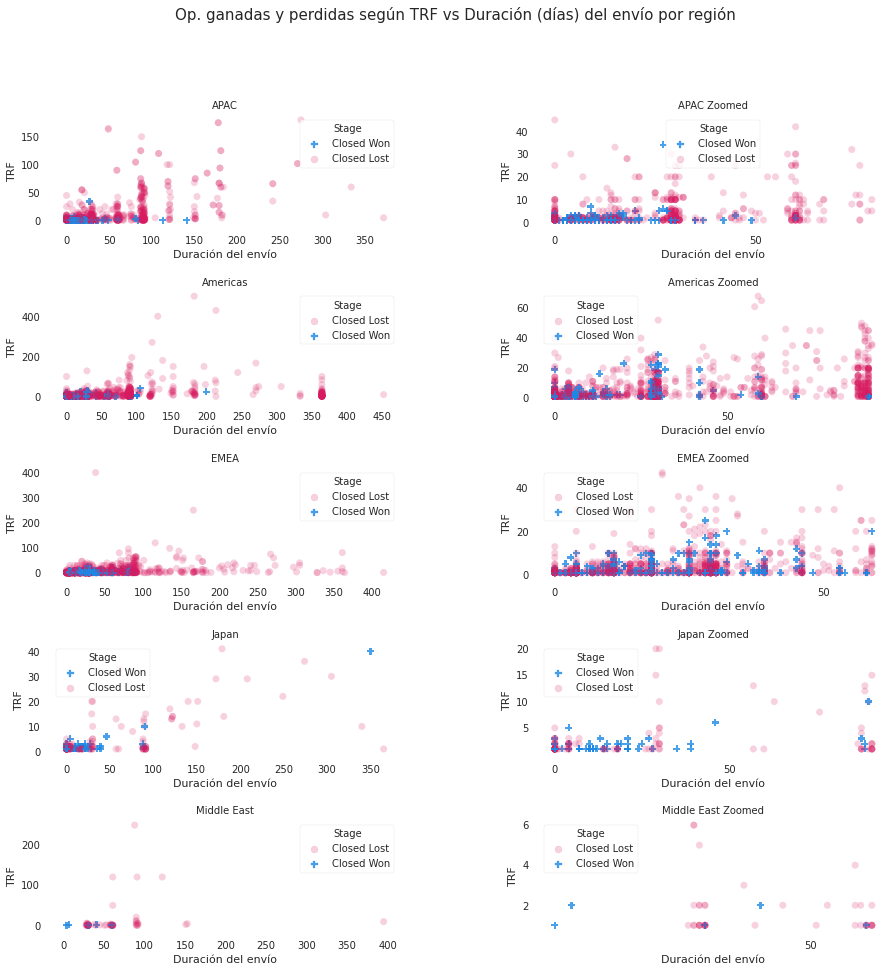

In [ ]:

n_cols = 2
fig, axes = plt.subplots(5, n_cols, figsize=(15, 15))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
zoom = {
    'APAC': (80, 50),
    'Americas': (100, 70),
    'EMEA': (60, 60),
    'Japan': (100, 30),
    'Middle East': (70, 40),
}
for i, (name, group) in enumerate(df_filtrados_por_intervalo.groupby('Region')):
  plot_scatter_trf_vs_delivery(group, name, axes[i][0])
  plot_scatter_trf_vs_delivery(group[(group['Delivery_Interval'] < zoom[name][0]) & \
                                     (group['TRF'] < zoom[name][1])], name + " Zoomed", axes[i][1])

fig.suptitle('Op. ganadas y perdidas según TRF vs Duración (días) del envío por región', 
  fontsize=15)
print()

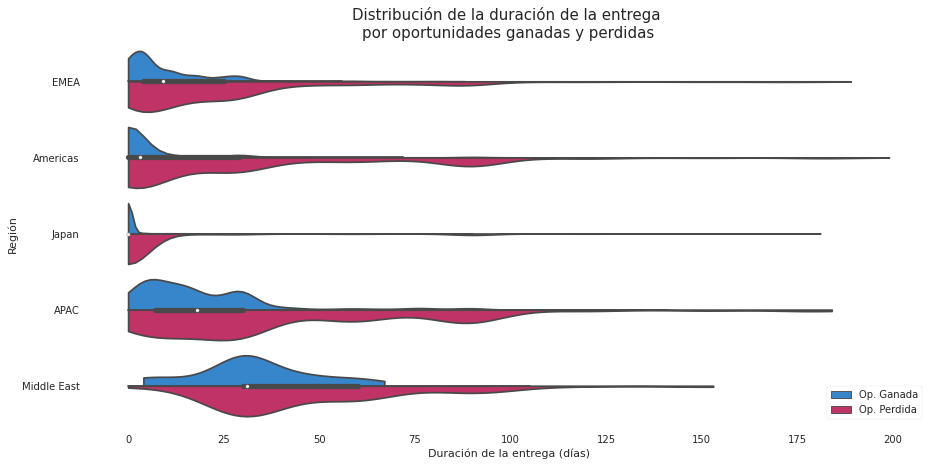

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.violinplot(y="Region", x="Delivery_Interval", hue="Stage",
               data=df_filtrados_por_intervalo \
               [df_filtrados_por_intervalo['Delivery_Interval'] < 200], 
               split=True, ax=ax, scale="width", cut=0,
               hue_order=['Closed Won', 'Closed Lost'], palette={
                  'Closed Won': (0.118, 0.533, 0.898, 0.8),
                  'Closed Lost': (0.847, 0.106, 0.376, 0.2),
               })
# legend = ax._legend

ax.set(xlabel='Duración de la entrega (días)', ylabel='Región')
ax.set_title('Distribución de la duración de la entrega \n'
             'por oportunidades ganadas y perdidas', fontdict={
                  'fontsize': 15,
                  'fontweight': 2,
                })
tipo_oportunidad_espanol = {
    'Closed Won': 'Op. Ganada',
    'Closed Lost': 'Op. Perdida'
}
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, list(tipo_oportunidad_espanol.values()),
          loc='lower right')
print()

## Tipo de familia de producto


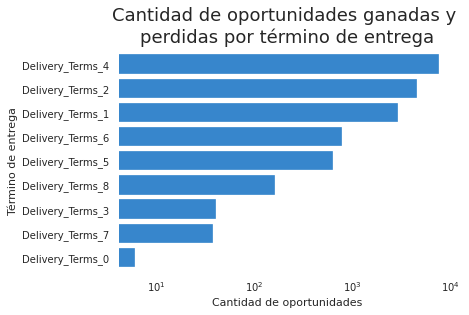

In [ ]:

ax = sns.barplot(data=df['Delivery_Terms'].value_counts().to_frame().reset_index(), 
                 y='index', x='Delivery_Terms', palette=[(0.118, 0.533, 0.898)])
ax.set_xscale('log')

ax.set(xlabel='Cantidad de oportunidades', ylabel='Término de entrega')
ax.set_title('Cantidad de oportunidades ganadas y \nperdidas por término de entrega', fontdict={
                    'fontsize': 18,
                    'fontweight': 2,
                  }, pad=10)
print()

In [ ]:
productos_won_lost_por_product_family = df.groupby('Product_Family').agg({
    'Stage': [('Won', lambda x: x[x == 'Closed Won'].count()),
              ('Lost', lambda x: x[x == 'Closed Lost'].count()),
              ('Count', 'count')],
    'Delivery_Interval': [('Delivery_Interval_Mean', 'mean')]
})
productos_won_lost_por_product_family.columns = ['Won', 'Lost', 'Count', 'Delivery_Interval_Mean']

productos_won_lost_por_product_family['Won_Ratio'] = \
  productos_won_lost_por_product_family['Won'] / \
  productos_won_lost_por_product_family['Count'] # Desprecio los otros posibles
                                                # Stages porque son poquitos
display(productos_won_lost_por_product_family.describe().T)
productos_won_lost_por_product_family.head(5)

,count,mean,std,min,25%,50%,75%,max
Won,227.0,41.995595,105.729765,0.0,1.500000,6.000000,22.500000,919.000000
Lost,227.0,32.378855,80.226654,0.0,0.000000,2.000000,15.000000,688.000000
Count,227.0,74.656388,177.052630,1.0,3.000000,9.000000,36.000000,1345.000000
Delivery_Interval_Mean,226.0,24.325351,30.051283,0.0,8.062500,17.354167,29.745399,258.023729
Won_Ratio,227.0,0.616582,0.329647,0.0,0.395623,0.647679,1.000000,1.000000


,Won,Lost,Count,Delivery_Interval_Mean,Won_Ratio
Product_Family,,,,,
Product_Family_0,96,69,165,0.206061,0.581818
Product_Family_1,9,4,13,1.692308,0.692308
Product_Family_10,76,40,116,0.198276,0.655172
Product_Family_100,317,302,619,20.150729,0.512116
Product_Family_101,8,11,19,13.631579,0.421053


In [ ]:
productos_won_lost_por_product_family = productos_won_lost_por_product_family \
  [productos_won_lost_por_product_family['Count'] > 200] # Ecuación de de Moivre

In [ ]:
top_7_productos_won_lost_por_product_family = \
  productos_won_lost_por_product_family.nlargest(7, columns=['Won_Ratio']) \
  .iloc[::-1]

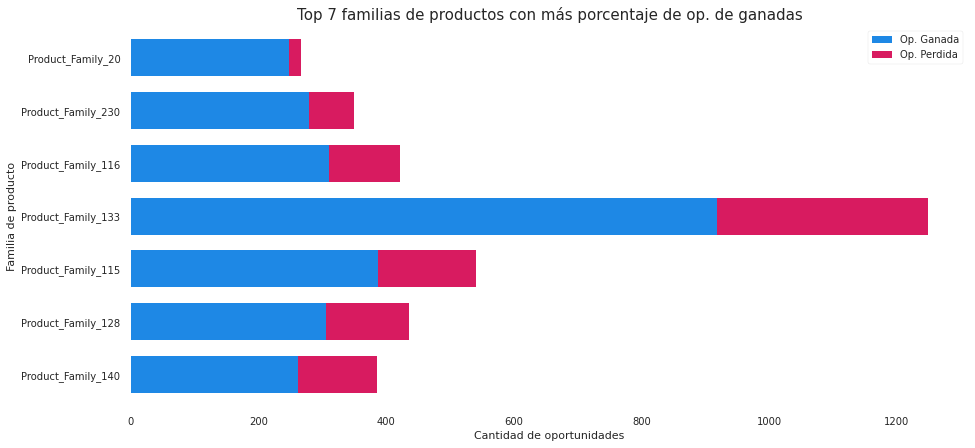

In [ ]:
axes = top_7_productos_won_lost_por_product_family[['Won', 'Lost']] \
  .plot.barh(stacked=True, 
             color={
      'Won': '#1E88E5',
      'Lost': '#D81B60',
  }, linewidth=0, width=0.7, figsize=(15, 7))

axes.set_title('Top 7 familias de productos con más porcentaje de op. de ganadas', 
               fontdict={
                  'fontsize': 15,
                  'fontweight': 2,
                })

tipo_oportunidad_espanol = {
    'Won': 'Op. Ganada',
    'Lost': 'Op. Perdida'
}
axes.legend([tipo_oportunidad_espanol.get(label, label) 
             for label in axes.get_legend_handles_labels()[1]])
axes.set(xlabel='Cantidad de oportunidades', ylabel='Familia de producto')
print()


In [ ]:
top_7_worst_productos_won_lost_por_product_family = \
  productos_won_lost_por_product_family.nsmallest(7, columns=['Won_Ratio']) \
  .iloc[::-1]

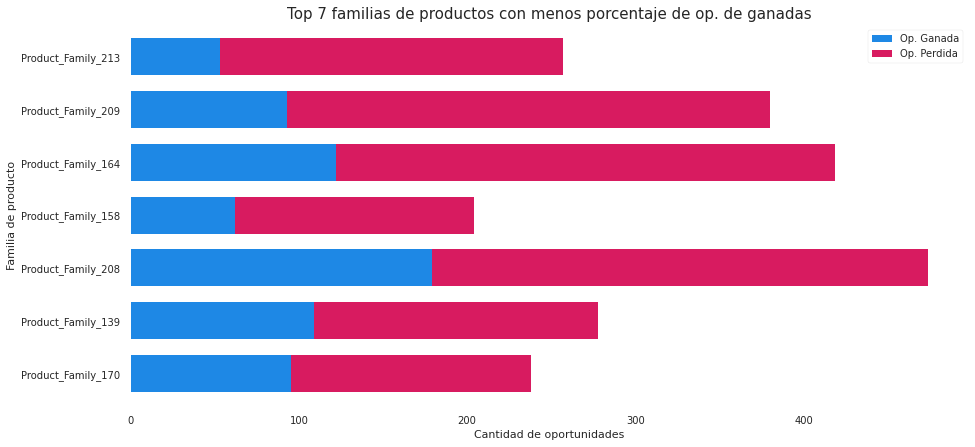

In [ ]:
axes = top_7_worst_productos_won_lost_por_product_family[['Won', 'Lost']] \
  .plot.barh(stacked=True, 
             color={
      'Won': '#1E88E5',
      'Lost': '#D81B60',
  }, linewidth=0, width=0.7, figsize=(15, 7))

axes.set_title('Top 7 familias de productos con menos porcentaje de op. de ganadas', 
               fontdict={
                  'fontsize': 15,
                  'fontweight': 2,
                })

tipo_oportunidad_espanol = {
    'Won': 'Op. Ganada',
    'Lost': 'Op. Perdida'
}
axes.legend([tipo_oportunidad_espanol.get(label, label) 
             for label in axes.get_legend_handles_labels()[1]])
axes.set(xlabel='Cantidad de oportunidades', ylabel='Familia de producto')
print()

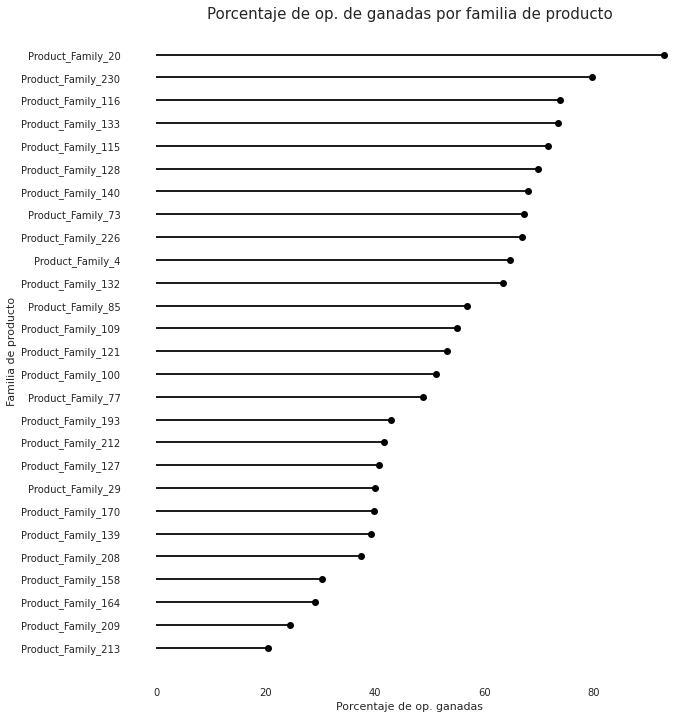

In [ ]:
df_ordenados_por_won_ratio = productos_won_lost_por_product_family \
  [(productos_won_lost_por_product_family['Count'] > 100)] \
  .sort_values(by='Won_Ratio')
plt.figure(figsize=(10, 12))
plt.plot(df_ordenados_por_won_ratio['Won_Ratio'] * 100,
         df_ordenados_por_won_ratio.index, marker='o', color='black', 
         linestyle='')
plt.hlines(df_ordenados_por_won_ratio.index, xmin=0, 
            xmax=df_ordenados_por_won_ratio['Won_Ratio'] * 100)
axes = plt.gca()
axes.set_title('Porcentaje de op. de ganadas por familia de producto', 
               fontdict={
                  'fontsize': 15,
                  'fontweight': 2,
                })
axes.set(xlabel='Porcentaje de op. ganadas', ylabel='Familia de producto')
print()

### Total Amount respecto TRF

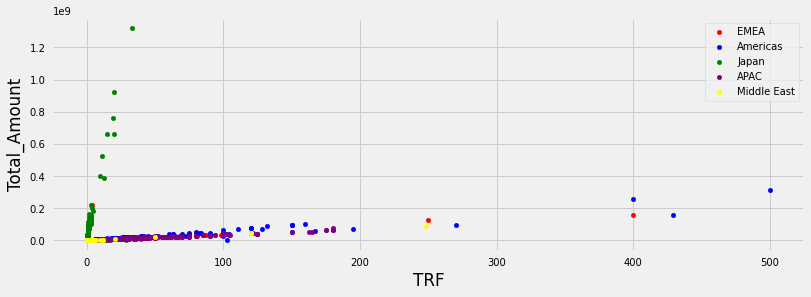

In [ ]:
plt.style.use('fivethirtyeight')
regiones = df['Region'].unique()
fig, ax = plt.subplots()
colores = ['red', 'blue', 'green', 'purple', 'yellow']
index_color = 0
for region in regiones:
  df[df['Region'] == region].plot.scatter(x='TRF', y='Total_Amount', label=region, ax=ax, c=colores[index_color], figsize=(12,4))
  index_color += 1

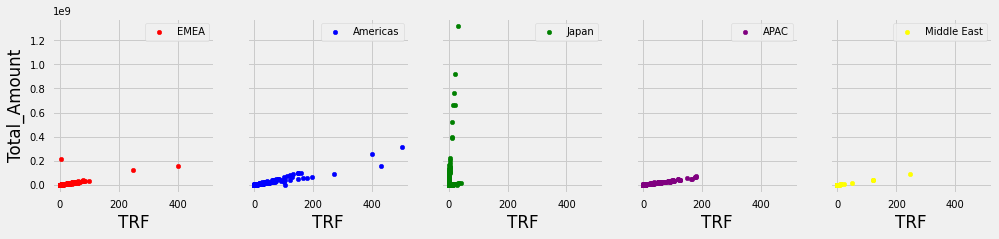

In [ ]:
regiones = df['Region'].unique()
fig, ax = plt.subplots(1, 5, sharex=True, sharey=True)
colores = ['red', 'blue', 'green', 'purple', 'yellow']
index_color = 0
for region in regiones:
  df[df['Region'] == region].plot.scatter(x='TRF', y='Total_Amount', label=region, ax=ax[index_color], c=colores[index_color], figsize=(15,3))
  index_color += 1

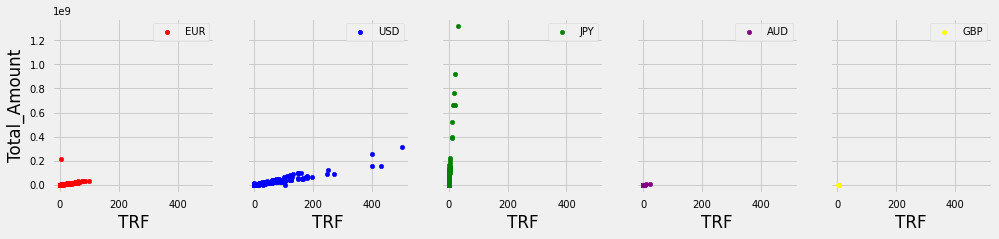

In [ ]:
regiones = df['Total_Amount_Currency'].unique()
fig, ax = plt.subplots(1, 5, sharex=True, sharey=True)
colores = ['red', 'blue', 'green', 'purple', 'yellow']
index_color = 0
for region in regiones:
  df[df['Total_Amount_Currency'] == region].plot.scatter(x='TRF', y='Total_Amount', label=region, ax=ax[index_color], c=colores[index_color], figsize=(15,3))
  index_color += 1

# Gráficos de prueba
Faltan pulirlos, y puede que no sirvan

In [ ]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.io import show 
from bokeh.sampledata.les_mis import data
import numpy as np

def generate_chord_for_owners(data):
  nodes = hv.Dataset(pd.DataFrame(pd.concat([data['Account_Owner'], 
                                  data['Opportunity_Owner']]).unique()).reset_index().rename(columns={
                                      0: 'Name'
                                  }), 'index')
  links = data[['Account_Owner',	'Opportunity_Owner', 'Stage']]
  links = links[links['Account_Owner'] != links['Opportunity_Owner']]
  # display(links)
  # display(links.count())

  # display(links.groupby(['Account_Owner',	'Opportunity_Owner']).size().reset_index())

  # display(links.count())
  links['value'] = links.groupby(['Account_Owner',	'Opportunity_Owner']).transform('count')\
    .reset_index().iloc[:,1]

  
  links = links[links['value'] > 5]
  links = links \
          .merge(nodes.data, right_on='Name',
          left_on='Account_Owner') \
          .merge(nodes.data, right_on='Name',
          left_on='Opportunity_Owner')[['index_x', 'index_y', 'value', 'Stage']]
  
  if links.empty:
    return
  hv.extension('bokeh')
  hv.output(size=300)
  chord = hv.Chord((links, nodes)) #.select(value=(5, None))
  return chord.opts(
      opts.Chord(
          cmap='Category10', 
          edge_cmap=['#d81b60', '#1e88e5'],
          # colors={'red', 'green'},
          edge_color=dim('Stage').str(),
          labels='Name',
          # node_color=dim('index').str()
      )
  )

(generate_chord_for_owners(df))

In [ ]:
for name, group in df.groupby('Region'):
  print(name)
  # display(group.head(10))
  display(generate_chord_for_owners(group))

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def create_parallel_owners(data):
  df_for_parallel = data.copy()
  df_for_parallel['count_1'] = df_for_parallel.groupby(['Account_Owner']) \
    ['Opportunity_Owner'].transform('size')
  df_for_parallel = df_for_parallel[df_for_parallel['count_1'] > 100]

  df_for_parallel['count_2'] = df_for_parallel.groupby(['Opportunity_Owner']) \
    ['Account_Owner'].transform('size')
  df_for_parallel = df_for_parallel[df_for_parallel['count_2'] > 100]

  df_for_parallel.loc[:,'Won'] = (df_for_parallel['Stage'] == 'Closed Won').astype(int)
  colorscale = [[0, 'rgb(0.847, 0.106, 0.376)'], [1, 'rgb(0.118, 0.533, 0.898)']]

  account_owner = go.parcats.Dimension(
      values=df_for_parallel['Account_Owner'],
      categoryorder='category ascending', label="Dueño de \nla cuenta"
  )
  opportunity_owner = go.parcats.Dimension(
      values=df_for_parallel['Opportunity_Owner'],
      categoryorder='category ascending', label="Dueño de \nla oportunidad"
  )
  fig = go.Figure(data = [go.Parcats(dimensions=[account_owner, opportunity_owner],
          line={'color': df_for_parallel['Won'], 'colorscale': colorscale},
          labelfont={'size': 18, 'family': 'Helvetica'},
          tickfont={'size': 12, 'family': 'Helvetica'},
          arrangement='freeform')])

  fig.update_layout(
          height=800, width=500, xaxis={'title': 'Horsepower'},
          yaxis={'title': 'MPG', 'domain': [0.6, 1]},
          dragmode='lasso', hovermode='closest')
  fig.show()


for name, group in df.groupby('Region'):
  print(name)
  create_parallel_owners(group)


create_parallel_owners(df)

In [ ]:
df_product_owner = df.copy()

df_product_owner = (df_product_owner.groupby(['Region', 'Account_Owner']).agg({
    'Stage': [('Won', lambda x: x[x == 'Closed Won'].count()),
              ('Lost', lambda x: x[x == 'Closed Lost'].count()),
              ('Count', 'count')]
  }).reset_index()
)
df_product_owner.columns = ['Region', 'Account_Owner', 'Won', 'Lost', 'Count']
df_product_owner['Win_Ratio_Opp_Owner'] = df_product_owner['Won'] / df_product_owner['Count']
df_product_owner.head(80)

,Region,Account_Owner,Won,Lost,Count,Win_Ratio_Opp_Owner
0,APAC,Person_Name_11,0,10,10,0.000000
1,APAC,Person_Name_13,2,7,9,0.222222
2,APAC,Person_Name_17,0,2,2,0.000000
3,APAC,Person_Name_2,0,1,1,0.000000
4,APAC,Person_Name_21,132,34,166,0.795181
...,...,...,...,...,...,...
70,Middle East,Person_Name_41,0,1,1,0.000000
71,Middle East,Person_Name_5,44,102,160,0.275000
72,Middle East,Person_Name_60,0,1,1,0.000000
73,Middle East,Person_Name_62,0,5,5,0.000000


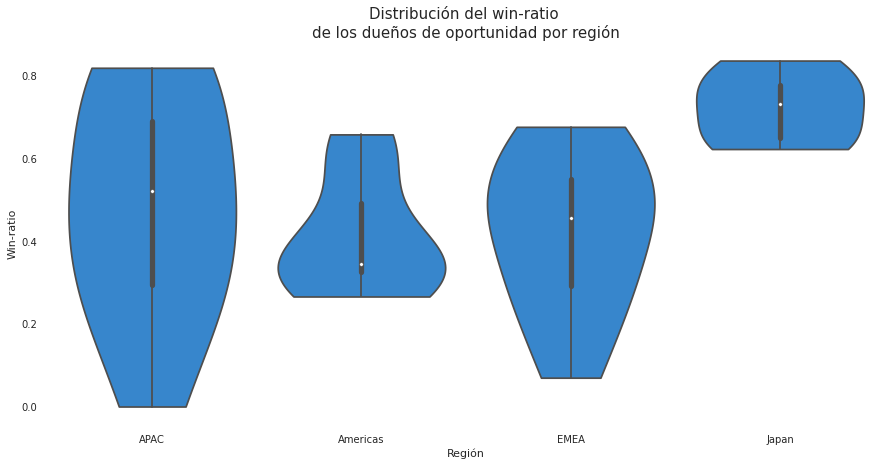

In [ ]:

fig, ax = plt.subplots(figsize=(15, 7))

sns.violinplot(x="Region", y="Win_Ratio_Opp_Owner",
               data=(df_product_owner[(df_product_owner['Count'] > 10) & 
                                     (df_product_owner['Region'] != 'Middle East')]),
               split=True, ax=ax, scale="width", cut=0,
               palette=[(0.118, 0.533, 0.898),])

ax.set(xlabel='Región', ylabel='Win-ratio')
ax.set_title('Distribución del win-ratio \n'
             'de los dueños de oportunidad por región', fontdict={
                  'fontsize': 15,
                  'fontweight': 2,
                })
print()

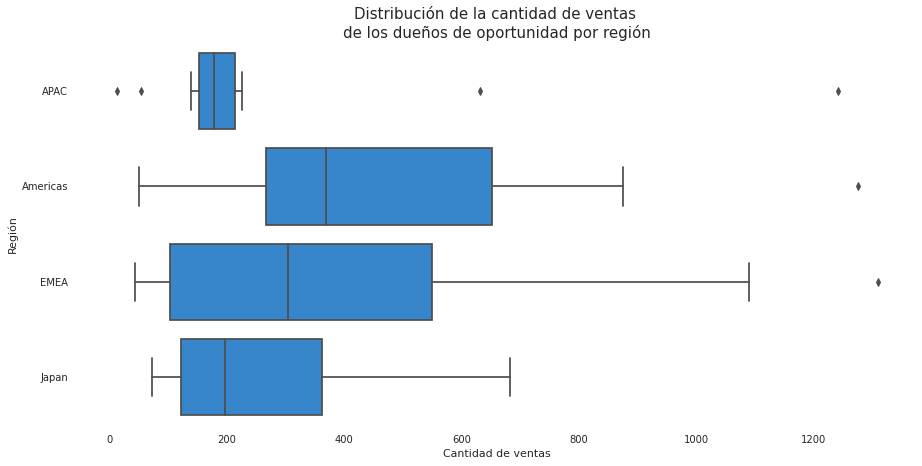

In [ ]:

fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(y="Region", x="Count",
               data=(df_product_owner[(df_product_owner['Count'] > 10) & (df_product_owner['Count'] < 1500) &
                                     (df_product_owner['Region'] != 'Middle East')]),
               ax=ax, palette=[(0.118, 0.533, 0.898),])

ax.set(xlabel='Cantidad de ventas', ylabel='Región')
ax.set_title('Distribución de la cantidad de ventas \n'
             'de los dueños de oportunidad por región', fontdict={
                  'fontsize': 15,
                  'fontweight': 2,
                })
print()

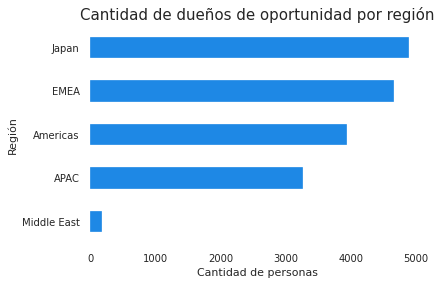

In [ ]:
df_product_owner_g = df.copy()

# df_product_owner_g = 
ax = (df_product_owner_g.groupby('Region').size().sort_values().plot.barh(color=[(0.118, 0.533, 0.898),]))
ax.set(xlabel='Cantidad de personas', ylabel='Región')
ax.set_title('Cantidad de dueños de oportunidad por región',
             fontdict={
              'fontsize': 15,
              'fontweight': 2,
            })
print()

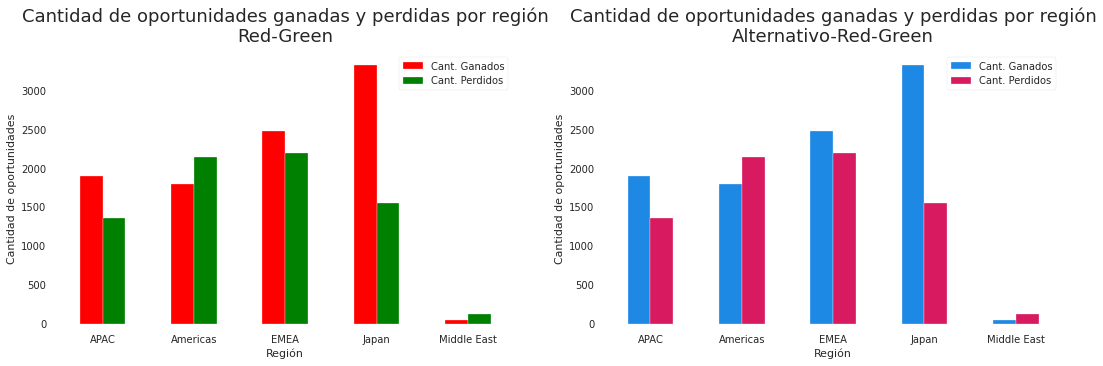

In [ ]:


stage_reducido = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]
stage_por_region = stage_reducido.groupby(['Region', 'Stage'])['ID'].count().unstack().reset_index()

stage_por_region = stage_por_region[['Region', 'Closed Won', 'Closed Lost']]
stage_por_region.columns = ['Region', 'Cant. Ganados', 'Cant. Perdidos']

fig, ax = plt.subplots(1, 2)
stage_por_region.plot(x='Region', y=['Cant. Ganados', 'Cant. Perdidos'], 
                      kind='bar', figsize=(18, 5), rot=0, ax=ax[1],
                      color=[(0.118, 0.533, 0.898),
                              (0.847, 0.106, 0.376)]) # o ['darkblue', 'crimson']

ax[1].set(xlabel='Región', ylabel='Cantidad de oportunidades')
      
ax[1].set_title('Cantidad de oportunidades ganadas y perdidas por región\nAlternativo-Red-Green', fontdict={
                    'fontsize': 18,
                    'fontweight': 2,
                  }, pad=10)

stage_por_region.plot(x='Region', y=['Cant. Ganados', 'Cant. Perdidos'], 
                      kind='bar', figsize=(18, 5), rot=0, ax=ax[0],
                      color=['red', 'green']) 
ax[0].set(xlabel='Región', ylabel='Cantidad de oportunidades')
      
ax[0].set_title('Cantidad de oportunidades ganadas y perdidas por región\nRed-Green', fontdict={
                    'fontsize': 18,
                    'fontweight': 2,
                  }, pad=10)
print()